# Homework 2

This homework should be submitted <b>by LT</b>.   

LT Number:

Names:

Do <b><u>NOT</u></b> import any other libraries aside from those below.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

plt.rcParams['figure.figsize'] = [15, 5]

## Curve Fitting

For this homework, we will be using the following datasets: `fit_data1.csv`, `fit_data2.csv`, `fit_data3.csv`, `fit_data4.csv`.

#### Q. Load the `fit_data1.csv` dataset using pandas and print the dataframe.

In [3]:
# Insert code here
df_data1 = pd.read_csv("fit_data1.csv")
print(df_data1)

            x           y
0    0.000000  292.073549
1    0.707071  214.164335
2    1.414141  230.606929
3    2.121212  303.335048
4    2.828283  251.714122
..        ...         ...
95  67.171717  428.026119
96  67.878788  397.565071
97  68.585859  337.196256
98  69.292929  403.412667
99  70.000000  432.073549

[100 rows x 2 columns]


#### Q. Create two variables `x` and `y` and assign the corresponding dataframe columns to them. Convert `x` and `y` into numpy arrays.

In [20]:
# Insert code here
x = df_data1['x']
y = df_data1['y']

x = x.to_numpy()
y = y.to_numpy()
x

array([ 0.        ,  0.70707071,  1.41414141,  2.12121212,  2.82828283,
        3.53535354,  4.24242424,  4.94949495,  5.65656566,  6.36363636,
        7.07070707,  7.77777778,  8.48484848,  9.19191919,  9.8989899 ,
       10.60606061, 11.31313131, 12.02020202, 12.72727273, 13.43434343,
       14.14141414, 14.84848485, 15.55555556, 16.26262626, 16.96969697,
       17.67676768, 18.38383838, 19.09090909, 19.7979798 , 20.50505051,
       21.21212121, 21.91919192, 22.62626263, 23.33333333, 24.04040404,
       24.74747475, 25.45454545, 26.16161616, 26.86868687, 27.57575758,
       28.28282828, 28.98989899, 29.6969697 , 30.4040404 , 31.11111111,
       31.81818182, 32.52525253, 33.23232323, 33.93939394, 34.64646465,
       35.35353535, 36.06060606, 36.76767677, 37.47474747, 38.18181818,
       38.88888889, 39.5959596 , 40.3030303 , 41.01010101, 41.71717172,
       42.42424242, 43.13131313, 43.83838384, 44.54545455, 45.25252525,
       45.95959596, 46.66666667, 47.37373737, 48.08080808, 48.78

#### Q. Plot a graph of the data as a <b><u>dashed blue line</u></b>.

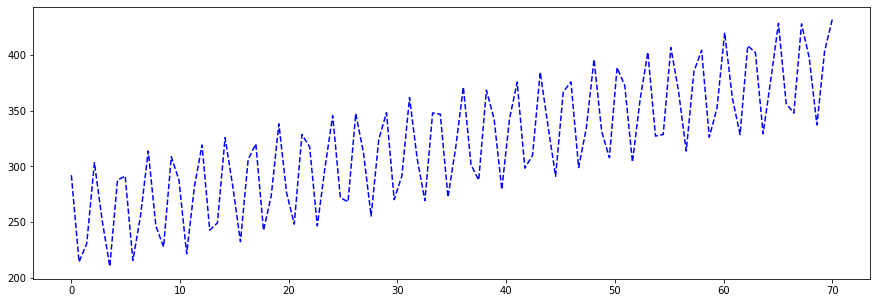

In [5]:
# Insert code here

plt.plot(x,y,'b--')
plt.show()

#### Q. Based on the plot above, choose an "appropriate" function to fit the data. Print the optimal parameters and SSR. 

In [16]:
# Insert code here
def linear(x, m, b):
    return m*x + b
def quadratic(x, a, b, c):
    return (a * x * x) + (b * x) + c
def cubic(x, a, b, c, d):
    return (a * x**3) + (b * x**2) + (c * x) + d
def sine(x, A, f, C, D):
    return A * np.sin((2 * np.pi * f * x) + C) + D 
def exponential(x, A, b):
    return A * np.exp(b * x)
def powerlaw(x, A, alpha):
    return A * (np.power(x, -alpha))

def logistic(x, A, k, x0):
    return A/(1 + np.exp(-k * (x - x0)))

def sine_and_linear(x, A, f, C, m,b):
    return A*np.sin((2*np.pi*f*x)+C) + m*x + b

In [7]:
popt, pcov = curve_fit(sine_and_linear,x,y)
ssr = sum((y-sine_and_linear(x,*popt))**2)

print("A:{}, f:{}, C:{}, m:{}, b:{}".format(*popt))
print("ssr:",ssr)



A:50.00000000000012, f:1.0, C:0.9999999999999886, m:2.000000000000001, b:250.00000000000009
ssr: 7.649643520268224e-23


#### Q. Plot the data as <u><b>blue dots</u></b> and plot you fitted function as a <b><u>smooth solid red line</u></b>.

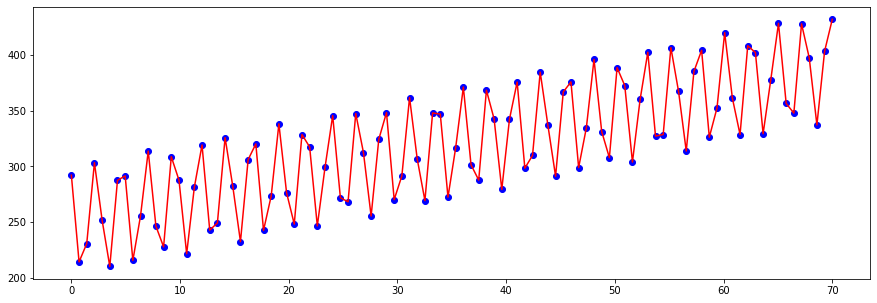

In [8]:
# Insert code here
x_range = np.linspace(min(x),max(x),100)

plt.plot(x_range,sine_and_linear(x_range,*popt),'r-')
plt.scatter(x,y, color="blue")
plt.show()

#### Q. Load the `fit_data2.csv` dataset using pandas and print the dataframe.

In [9]:
# Insert code here

df_data2 = pd.read_csv("fit_data2.csv")
print(df_data2)

            x         y
0    0.000000  0.000000
1    0.008008  0.007944
2    0.016016  0.015762
3    0.024024  0.023454
4    0.032032  0.031022
..        ...       ...
995  7.967968  0.002760
996  7.975976  0.002741
997  7.983984  0.002722
998  7.991992  0.002703
999  8.000000  0.002684

[1000 rows x 2 columns]


#### Q. Create two variables `x` and `y` and assign the corresponding dataframe columns to them. Convert `x` and `y` into numpy arrays.

In [10]:
# Insert code here

x_2 = df_data2['x'].to_numpy()
y_2 = df_data2['y'].to_numpy()

#### Q. Plot a graph of the data as a <b><u>dashed blue line</u></b>.

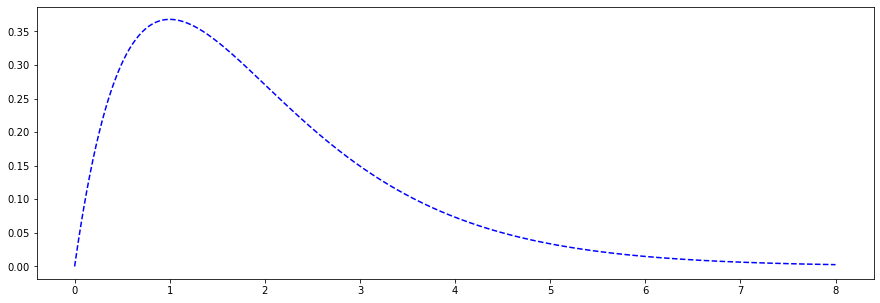

In [11]:
# Insert code here

plt.plot(x_2,y_2,'b--')
plt.show()

#### Q. Based on the plot above, choose an "appropriate" function to fit the data. Print the optimal parameters and SSR.

parameters: 0.36799899399343095 -0.3191935919215089
ssr: 4.820265492791225


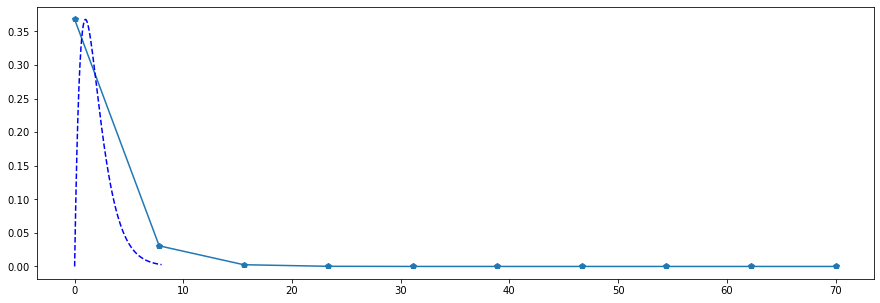

In [17]:
# Insert code here
popt, pcov = curve_fit(exponential,x_2,y_2)



ssr = sum((y_2-exponential(x_2,*popt))**2)
print("parameters:",*popt)
print("ssr:",ssr)

x_range = np.linspace(min(x),max(x),10)

plt.plot(x_range,exponential(x_range,*popt),'p-')
plt.plot(x_2,y_2,"b--")
plt.show()

(4.0, 2.3117116336913672)

#### Q. Plot the data as <u><b>blue dots</u></b> and plot you fitted function as a <b><u>smooth solid red line</u></b>. 

In [ ]:
# Insert code here

#### Q. Load the `fit_data3.csv` dataset using pandas and print the dataframe.

In [ ]:
# Insert code here

#### Q. Create two variables `x` and `y` and assign the corresponding dataframe columns to them. Convert `x` and `y` into numpy arrays.

In [ ]:
# Insert code here

#### Q. Plot a graph of the data as a <b><u>dashed blue line</u></b>. (you may also want to check what the plot looks like as dots) 

In [ ]:
# Insert code here

#### Q. Based on the plot above, choose an "appropriate" function to fit the data. Print the optimal parameters and SSR.

In [ ]:
# Insert code here

#### Q. Plot the data as <u><b>blue dots</u></b> and plot you fitted function as a <b><u>smooth solid red line</u></b>. 

In [ ]:
# Insert code here

#### Q. Load the `fit_data4.csv` dataset using pandas and print the dataframe.

In [ ]:
# Insert code here

#### Q. Create two variables `x` and `y` and assign the corresponding dataframe columns to them. Convert `x` and `y` into numpy arrays.

In [ ]:
# Insert code here

#### Q. Plot a graph of the data as a <b><u>dashed blue line</u></b>. (you may also want to check what the plot looks like as dots)

In [ ]:
# Insert code here

#### Q. Based on the plot above, choose an "appropriate" function to fit the data. Print the optimal parameters and SSR.

In [ ]:
# Insert code here

#### Q. Plot the data as <u><b>blue dots</u></b> and plot you fitted function as a <b><u>smooth solid red line</u></b>.

In [ ]:
# Insert code here